In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [200]:
df_train=pd.read_csv('C:/Users/dheer/Desktop/flowers/Flight_Ticket_Participant_Datasets/Data_Train.csv')
df_test=pd.read_csv('C:/Users/dheer/Desktop/flowers/Flight_Ticket_Participant_Datasets/Test_set.csv')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [201]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"]).dt.strftime('%Y-%m-%d')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [202]:
df_train.columns=['Airline','Date','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Price']


In [203]:
df_train.Date = pd.to_datetime(df_train.Date)


In [233]:
#df_train.sort_values(by='Date', inplace=True)

In [230]:
#df_train.columns=['Airline','Date','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Price']


In [204]:
df_train.head()

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [205]:
print(len(df_train))
df_train=df_train.dropna()
print(len(df_train))

10683
10682


In [206]:
df_train['Depart_Time_Hour'] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Depart_Time_Minutes'] = pd.to_datetime(df_train.Dep_Time).dt.minute

df_train.drop(labels = 'Dep_Time', axis = 1, inplace = True)


df_train['Arr_Time_Hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arr_Time_Minutes'] = pd.to_datetime(df_train.Arrival_Time).dt.minute

df_train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
df_train.head()


,Airline,Date,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35


In [207]:
duration = list(df_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
df_train['Duration_hours'] = dur_hours
df_train['Duration_minutes'] =dur_minutes

df_train.drop(labels = 'Duration', axis = 1, inplace = True)
df_train.head()





,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45


In [208]:
pd.isnull(df_train).sum()

Airline                0
Date                   0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Price                  0
Depart_Time_Hour       0
Depart_Time_Minutes    0
Arr_Time_Hour          0
Arr_Time_Minutes       0
Duration_hours         0
Duration_minutes       0
dtype: int64

In [209]:
df_train.describe(include='all')

,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes
count,10682,10682,10682,10682,10682,10682,10682,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
unique,12,40,5,6,128,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,2019-05-18 00:00:00,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3849,504,4536,4536,2376,5625,8344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000


In [210]:
df_train.tail()

,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,2,40
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,10,55,19,15,8,20


C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


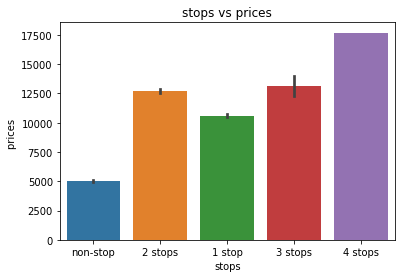

In [211]:

sns.barplot(x='Total_Stops',y='Price',data=df_train)
plt.title("stops vs prices")
plt.xlabel("stops")
plt.ylabel("prices ")
plt.show()

C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


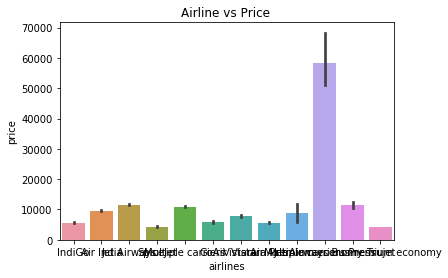

In [212]:
sns.barplot(x='Airline',y='Price',data=df_train)
plt.title("Airline vs Price ")
plt.xlabel("airlines")
plt.ylabel("price")
plt.show()


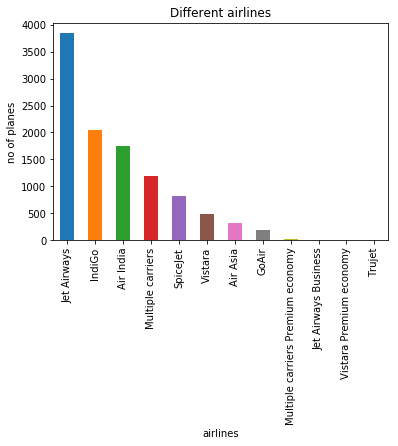

In [213]:
df_train['Airline'].value_counts().plot.bar()
plt.title('Different airlines')
plt.xlabel('airlines')
plt.ylabel('no of planes')
plt.show()

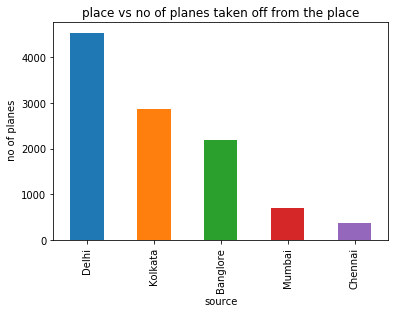

<Figure size 360x720 with 0 Axes>

In [214]:
df_train['Source'].value_counts().plot.bar()
plt.title("place vs no of planes taken off from the place")
plt.xlabel('source')
plt.ylabel(" no of planes")
fig=plt.figure(figsize=(5,10))
plt.show()

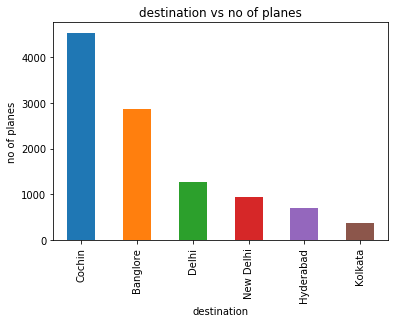

In [215]:
#airline vs price
df_train['Destination'].value_counts().plot.bar()
plt.title("destination vs no of planes")
plt.xlabel("destination")
plt.ylabel("no of planes")
plt.show()

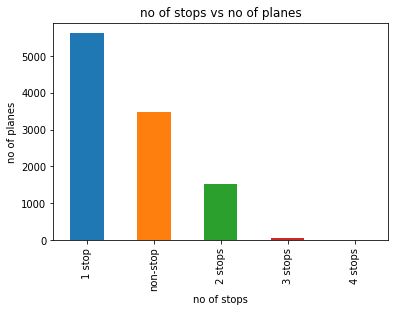

In [216]:
df_train['Total_Stops'].value_counts().plot.bar()
plt.title("no of stops vs no of planes")
plt.xlabel("no of stops")
plt.ylabel("no of planes")
plt.show()

In [217]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None
df_train['day_of_week'] = df_train['Date'].dt.weekday_name

df_train.tail()

,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,2,30,Wednesday
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,2,35,Saturday
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,3,0,Saturday
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,2,40,Thursday
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,10,55,19,15,8,20,Thursday


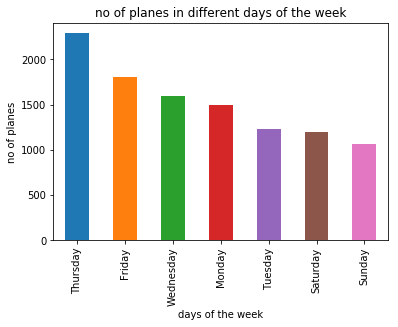

In [218]:
df_train['day_of_week'].value_counts().plot.bar()
plt.title("no of planes in different days of the week")
plt.xlabel("days of the week")
plt.ylabel("no of planes")
plt.show()

C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


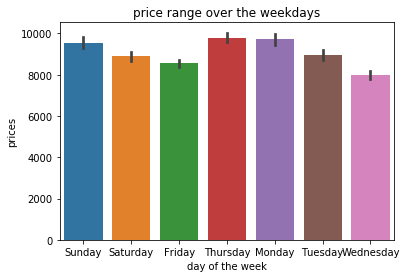

In [219]:
sns.barplot(x='day_of_week',y='Price',data=df_train)
plt.xlabel("day of the week")
plt.title("price range over the weekdays")
plt.ylabel("prices")
plt.show()

In [220]:
from sklearn.preprocessing import LabelEncoder

In [221]:
lb=LabelEncoder()
df_train['Airline']=lb.fit_transform(df_train['Airline'])
#x_2=df_train.iloc[:,4].values
#x_2=lb.fit_transform(x_2)

In [222]:
df_train.head()

,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50,Sunday
1,1,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25,Saturday
2,4,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0,Friday
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25,Thursday
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45,Thursday


In [223]:
lb=LabelEncoder()
df_train['Source']=lb.fit_transform(df_train['Source'])
df_train.head()


,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
0,3,2019-03-24,0,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50,Sunday
1,1,2019-01-05,3,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25,Saturday
2,4,2019-09-06,2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0,Friday
3,3,2019-12-05,3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25,Thursday
4,3,2019-01-03,0,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45,Thursday


In [224]:
lb=LabelEncoder()
df_train['Destination']=lb.fit_transform(df_train['Destination'])
df_train.head()


,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
0,3,2019-03-24,0,5,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50,Sunday
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25,Saturday
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0,Friday
3,3,2019-12-05,3,0,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25,Thursday
4,3,2019-01-03,0,5,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45,Thursday


In [225]:
lb=LabelEncoder()
df_train['day_of_week']=lb.fit_transform(df_train['day_of_week'])
df_train.head()


,Airline,Date,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
0,3,2019-03-24,0,5,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50,3
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25,2
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0,0
3,3,2019-12-05,3,0,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25,4
4,3,2019-01-03,0,5,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45,4


In [226]:
#airlines vs prices
df_train['Airline'].value_counts()

4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [55]:
#from sklearn.preprocessing import StandardScaler,LabelEncoder

C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


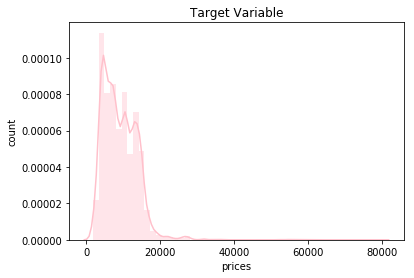

In [67]:
#plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(df_train['Price'], color = 'pink')
plt.title('Target Variable')
plt.xlabel('prices')
plt.ylabel('count')
plt.show()

In [227]:
df_train.drop(labels = 'Date', axis = 1, inplace = True)

In [228]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [229]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
0,3,0,5,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50,3
1,1,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25,2
2,4,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0,0
3,3,3,0,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25,4
4,3,0,5,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45,4


In [245]:
#df_train=df_train.drop(['Duration','Arrival_Time','Dep_Time','Route','Total_Stops'],axis=1)

In [231]:

df_train['Additional_Info']=lb.fit_transform(df_train['Additional_Info'])
df_train['Total_Stops']=lb.fit_transform(df_train['Total_Stops'])
df_train.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes,day_of_week
0,3,0,5,BLR → DEL,4,8,3897,22,20,1,10,2,50,3
1,1,3,0,CCU → IXR → BBI → BLR,1,8,7662,5,50,13,15,7,25,2
2,4,2,1,DEL → LKO → BOM → COK,1,8,13882,9,25,4,25,19,0,0
3,3,3,0,CCU → NAG → BLR,0,8,6218,18,5,23,30,5,25,4
4,3,0,5,BLR → NAG → DEL,0,8,13302,16,50,21,35,4,45,4


In [232]:
x1 =df_train.drop(['Price'],axis=1).values

In [233]:
y=df_train['Price'].values

In [234]:
x1[:,3] = lb.fit_transform(x1[:,3])
x1[:,4]=lb.fit_transform(x1[:,4])
x1

array([[3, 0, 5, ..., 2, 50, 3],
       [1, 3, 0, ..., 7, 25, 2],
       [4, 2, 1, ..., 19, 0, 0],
       ...,
       [4, 0, 2, ..., 3, 0, 2],
       [10, 0, 5, ..., 2, 40, 4],
       [1, 2, 1, ..., 8, 20, 4]], dtype=object)

In [235]:
x1.shape

(10682, 13)

In [236]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [237]:
df_test["Date_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"]).dt.strftime('%Y-%m-%d')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [238]:
df_test.columns=['Airline','Date','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']


In [239]:
df_test.Date = pd.to_datetime(df_test.Date)


In [291]:
#df_test.sort_values(by='Date', inplace=True)

In [240]:
df_test['Airline']=lb.fit_transform(df_test['Airline'])
df_test['Source']=lb.fit_transform(df_test['Source'])
df_test['Destination']=lb.fit_transform(df_test['Destination'])
df_test.head()



,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2019-06-06,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,3,2019-12-05,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,4,2019-05-21,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,6,2019-05-21,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,0,2019-06-24,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [241]:
df_test['Additional_Info']=lb.fit_transform(df_test['Additional_Info'])
df_test.head()


,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,2019-06-06,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,2019-12-05,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,2019-05-21,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,2019-05-21,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,2019-06-24,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [242]:
pd.options.mode.chained_assignment = None
df_test['day_of_week'] = df_test['Date'].dt.weekday_name

df_test.tail()

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week
2666,1,2019-06-06,3,0,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,5,Thursday
2667,3,2019-03-27,3,0,CCU → BLR,14:20,16:55,2h 35m,non-stop,5,Wednesday
2668,4,2019-06-03,2,1,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,5,Monday
2669,1,2019-06-03,2,1,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,5,Monday
2670,6,2019-06-15,2,1,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,5,Saturday


In [243]:
df_test=df_test.drop(['Date'],axis=1)

In [244]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week
0,4,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5,Thursday
1,3,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5,Thursday
2,4,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3,Tuesday
3,6,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,5,Tuesday
4,0,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5,Monday


In [245]:
df_test['day_of_week']=lb.fit_transform(df_test['day_of_week'])
df_test['Total_Stops']=lb.fit_transform(df_test['Total_Stops'])
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week
0,4,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,0,5,4
1,3,3,0,CCU → MAA → BLR,06:20,10:20,4h,0,5,4
2,4,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,0,3,5
3,6,2,1,DEL → BOM → COK,08:00,21:00,13h,0,5,5
4,0,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,4,5,1


In [246]:
df_test['Depart_Time_Hour'] = pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Depart_Time_Minutes'] = pd.to_datetime(df_test.Dep_Time).dt.minute

df_test.drop(labels = 'Dep_Time', axis = 1, inplace = True)


df_test['Arr_Time_Hour'] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arr_Time_Minutes'] = pd.to_datetime(df_test.Arrival_Time).dt.minute

df_test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
df_test.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day_of_week,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,4,2,1,DEL → BOM → COK,10h 55m,0,5,4,17,30,4,25
1,3,3,0,CCU → MAA → BLR,4h,0,5,4,6,20,10,20
2,4,2,1,DEL → BOM → COK,23h 45m,0,3,5,19,15,19,0
3,6,2,1,DEL → BOM → COK,13h,0,5,5,8,0,21,0
4,0,0,2,BLR → DEL,2h 50m,4,5,1,23,55,2,45


In [247]:
durationT = list(df_test['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
df_test['Duration_hours'] = dur_hours
df_test['Duration_minutes'] = dur_minutes

df_test.drop(labels = 'Duration', axis = 1, inplace = True)

In [248]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day_of_week,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hours,Duration_minutes
0,4,2,1,DEL → BOM → COK,0,5,4,17,30,4,25,10,55
1,3,3,0,CCU → MAA → BLR,0,5,4,6,20,10,20,4,0
2,4,2,1,DEL → BOM → COK,0,3,5,19,15,19,0,23,45
3,6,2,1,DEL → BOM → COK,0,5,5,8,0,21,0,13,0
4,0,0,2,BLR → DEL,4,5,1,23,55,2,45,2,50


In [249]:
x_test=df_test.iloc[:,:].values

In [250]:
x_test.shape

(2671, 13)

In [251]:
x_test[:,3]=lb.fit_transform(x_test[:,3])
x_test[:,4]=lb.fit_transform(x_test[:,4])


In [187]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

x1 = sc_X.fit_transform(x1)

x_test = sc_X.transform(x_test)

#sc_y = StandardScaler()

y = y.reshape((len(y), 1)) 

y = sc_X.fit_transform(y)

y = y.ravel()

C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [252]:
print(pd.DataFrame(x1).head())

  0  1  2    3  4  5   6   7   8   9   10  11 12
0  3  0  5   18  4  8  22  20   1  10   2  50  3
1  1  3  0   84  1  8   5  50  13  15   7  25  2
2  4  2  1  118  1  8   9  25   4  25  19   0  0
3  3  3  0   91  0  8  18   5  23  30   5  25  4
4  3  0  5   29  0  8  16  50  21  35   4  45  4


In [190]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1,y)
y_pred = sc_X.inverse_transform(lr.predict(x_test))
y_pred[0]



10233.553394481625

In [191]:
y_test=pd.read_csv("C:/Users/dheer/Downloads/y_test.csv")

In [192]:
y_test=y_test.values

array([16612], dtype=int64)

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse= mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 12043.303273170666


In [194]:
from sklearn.svm import SVR

svr = SVR(kernel = "rbf")

svr.fit(x1,y)

y_pred=sc_X.inverse_transform(svr.predict(x_test))
y_pred[0]

#pd.DataFrame(y_pred, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)


6474.576785462545

In [359]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [195]:
import pickle
import xgboost as xgb

In [196]:
xgb_first=xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
xgb_first.fit(x1,y)
y_pred=sc_X.inverse_transform(xgb_first.predict(x_test))
y_pred

array([ 9562.191 ,  6858.4253, 28733.44  , ...,  9562.191 ,  7809.0996,
       10722.556 ], dtype=float32)

In [197]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 12129.546996769677


In [257]:
#without standard scalar
xgb_first=xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
xgb_first.fit(x1,y)
y_pred=xgb_first.predict(x_test)
y_pred[0]


9523.431

In [254]:
#without standard_Scalar(LR)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1,y)
y_pred = lr.predict(x_test)
y_pred[0]


10233.553394481583

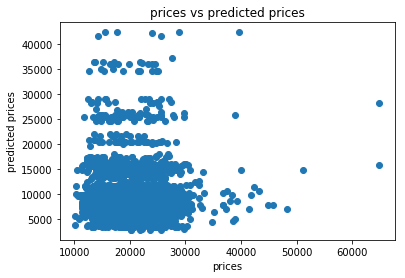

In [136]:
plt.scatter(y_test,y_pred)
plt.xlabel("prices")
plt.ylabel("predicted prices")
plt.title("prices vs predicted prices")
plt.show()